In [29]:
import numpy as np
import urllib
import os
import logging
from pathlib import Path
import pandas as pd
from causallearn.graph.GraphClass import CausalGraph
from causallearn.search.ConstraintBased.PC import pc
from causallearn.utils.PCUtils import SkeletonDiscovery
from causallearn.utils.PCUtils.BackgroundKnowledge import BackgroundKnowledge
from causallearn.utils.PCUtils.BackgroundKnowledgeOrientUtils import orient_by_background_knowledge
from causallearn.graph.GraphNode import GraphNode
from causallearn.utils.cit import fisherz
from causallearn.utils.cit import mv_fisherz
from causallearn.utils.cit import kci

In [85]:
# Load in csvs
WHR_file_name = 'world-happiness-report.csv'
WHR2021_file_name = 'world-happiness-report-2021.csv'
CPDS_file_name = 'CPDS_1960-2019_Update_2021.xlsx'
WHR_df = pd.read_csv('final_data/Cleaned_WHD.csv')
#WHR2021_df = pd.read_csv('data\{WHR2021_file_name}')
#CPDS_df = pd.read_excel('data\{CPDS_file_name}')


# Clean Data
#WHR_df = WHR_df.drop(columns = ['Positive affect','Negative affect'])
#WHR2021_df['year'] = 2021
#WHR2021_df = WHR2021_df.drop(columns = ['Standard error of ladder score','upperwhisker','lowerwhisker','Ladder score in Dystopia',
 #                         'Explained by: Log GDP per capita','Explained by: Social support','Explained by: Healthy life expectancy',
  #                        'Explained by: Freedom to make life choices','Explained by: Generosity','Explained by: Perceptions of corruption',
  #                        'Dystopia + residual'])
#WHR2021_df = WHR2021_df.rename(columns = {'Ladder score':'Life Ladder','Logged GDP per capita':'Log GDP per capita',
                #            'Healthy life expectancy':'Healthy life expectancy at birth'})

dic = {}
for i in WHR2021_df['Regional indicator'].unique():
    dic[i]=list(WHR2021_df[WHR2021_df['Regional indicator'] ==i].groupby('Country name').size().index)
dic['Sub-Saharan Africa'].append('Angola')
dic['Latin America and Caribbean'].append('Belize')
dic['South Asia'].append('Bhutan')
dic['Sub-Saharan Africa'].append('Central African Republic')
dic['Sub-Saharan Africa'].append('Congo (Kinshasa)')
dic['Latin America and Caribbean'].append('Cuba')
dic['Sub-Saharan Africa'].append('Djibouti')
dic['Latin America and Caribbean'].append('Guyana')
dic['Middle East and North Africa'].append('Oman')
dic['Middle East and North Africa'].append('Qatar')
dic['Sub-Saharan Africa'].append('Somalia')
dic['Sub-Saharan Africa'].append('Somaliland region')
dic['Sub-Saharan Africa'].append('South Sudan')
dic['Middle East and North Africa'].append('Sudan')
dic['Latin America and Caribbean'].append('Suriname')
dic['Middle East and North Africa'].append('Syria')
dic['Latin America and Caribbean'].append('Trinidad and Tobago')

def find_region(x):
    '''Helper Function to Return Region Name based on the Country Name entered'''
    for reg in dic.keys():
        for c in dic[reg]:
            if x == c:
                return reg
WHR_df['Regional indicator'] = WHR_df['Country name'].apply(find_region)

cmbd_WHR_df = pd.concat([WHR_df,WHR2021_df])

CPDS_file_name = 'CPDS_1960-2019_Update_2021.xlsx'
CPDS_df = pd.read_excel(f'data\{CPDS_file_name}')
CPDS_columns_to_drop = ['year_01','country_01','elect','year_02','country_02']

CPDS_df = CPDS_df.drop(columns = CPDS_columns_to_drop)
CPDS_df = CPDS_df.dropna(subset = ['year','country'])
def convert_to_int(x):
    return int(x)

CPDS_df['year'] = CPDS_df[['year']].applymap(convert_to_int)

all_data = pd.merge(cmbd_WHR_df,CPDS_df,how = 'left',left_on = ['year','Country name'],right_on = ['year','country'])

CPDS_df

NameError: name 'WHR2021_df' is not defined

In [86]:
WHR_df = WHR_df.rename(columns = {'Unnamed: 0': 'Country'})
WHR_df = WHR_df.set_index('Country')
#WHR_df.loc['Argentina']

In [88]:
for i in test.columns:
    test[i].apply(float)

In [87]:
cols = []
labs = ['2006', '2009', '2012', '2015', '2018', '2021']
for i in WHR_df.columns:
    if i[-4:] in labs:
        cols.append(i)
test = WHR_df[cols]
test.loc[test.index[-2:]]

,Life Ladder_2006,Log GDP per capita_2006,Social support_2006,Healthy life expectancy at birth_2006,Freedom to make life choices_2006,Generosity_2006,Perceptions of corruption_2006,Life Ladder_2009,Log GDP per capita_2009,Social support_2009,...,Freedom to make life choices_2018,Generosity_2018,Perceptions of corruption_2018,Life Ladder_2021,Log GDP per capita_2021,Social support_2021,Healthy life expectancy at birth_2021,Freedom to make life choices_2021,Generosity_2021,Perceptions of corruption_2021
Country,,,,,,,,,,,,,,,,,,,,,
Zambia,4.824,7.817,0.798,44.26,0.721,-0.006,0.785,5.260,7.978,0.782,...,0.791,0.048,0.811,4.073,8.145,0.708,55.809,0.782,0.061,0.823
Zimbabwe,3.826,7.711,0.822,41.58,0.431,-0.076,0.905,4.056,7.563,0.806,...,0.763,-0.068,0.844,3.145,7.943,0.750,56.201,0.677,-0.047,0.821


In [102]:
tier_list = {}
for i in WHR_df.columns:
    tier_list[i] = (int(i[-4:]) - 2005)
    
## Rename the nodes
    
nodes = cg.G.get_nodes()
names = list(WHR_df.columns)
for i in range(len(nodes)):
    
    node = nodes[i]
    name = names[i]
    node.set_name(name)
    
## Create the tiers

nodes = cg.G.get_nodes()
names = list(WHR_df.columns)
tier = {}
bk = BackgroundKnowledge()
for i in range(len(nodes)):
   #print(i.get_name())
    #print(d[int(i.get_name()[1])-1][1])
    
    node = nodes[i]
    name = names[i]
    #node.set_name(name)
    #tier[i.get_name()] = int(((d[int(i.get_name()[1:])-1][1])/3)+9) 
    
    t = tier_list[name]
    bk = bk.add_node_to_tier(node,int(t))
    

In [101]:
tier_list

{'Life Ladder_2006': 1,
 'Log GDP per capita_2006': 1,
 'Social support_2006': 1,
 'Healthy life expectancy at birth_2006': 1,
 'Freedom to make life choices_2006': 1,
 'Generosity_2006': 1,
 'Perceptions of corruption_2006': 1,
 'Life Ladder_2007': 2,
 'Log GDP per capita_2007': 2,
 'Social support_2007': 2,
 'Healthy life expectancy at birth_2007': 2,
 'Freedom to make life choices_2007': 2,
 'Generosity_2007': 2,
 'Perceptions of corruption_2007': 2,
 'Life Ladder_2008': 3,
 'Log GDP per capita_2008': 3,
 'Social support_2008': 3,
 'Healthy life expectancy at birth_2008': 3,
 'Freedom to make life choices_2008': 3,
 'Generosity_2008': 3,
 'Perceptions of corruption_2008': 3,
 'Life Ladder_2009': 4,
 'Log GDP per capita_2009': 4,
 'Social support_2009': 4,
 'Healthy life expectancy at birth_2009': 4,
 'Freedom to make life choices_2009': 4,
 'Generosity_2009': 4,
 'Perceptions of corruption_2009': 4,
 'Life Ladder_2010': 5,
 'Log GDP per capita_2010': 5,
 'Social support_2010': 5,
 '

In [89]:
test = test.drop(['Healthy life expectancy at birth_2015'], axis=1)

In [84]:
test[test.columns[24]]

Country
Afghanistan    53.2
Albania        67.8
Algeria         NaN
Angola          NaN
Argentina      68.2
               ... 
Venezuela      65.9
Vietnam        67.3
Yemen          54.3
Zambia         53.8
Zimbabwe       53.8
Name: Healthy life expectancy at birth_2015, Length: 166, dtype: float64

In [90]:
cg = pc(np.array(test), 0.05, \
   mv_fisherz, True, mvpc=True, uc_rule=1)

/Users/adamkreitzman/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2642: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/adamkreitzman/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2643: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


  0%|          | 0/41 [00:00<?, ?it/s]

In [124]:
cg = pc(np.array(test), 0.15, \
   mv_fisherz, True, mvpc=True, uc_rule=0, background_knowledge = bk)
cg.to_nx_graph()
cg.draw_nx_graph(skel=False)

/Users/adamkreitzman/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2642: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/adamkreitzman/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2643: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


  0%|          | 0/41 [00:00<?, ?it/s]

Green: undirected; Blue: directed; Red: bi-directed



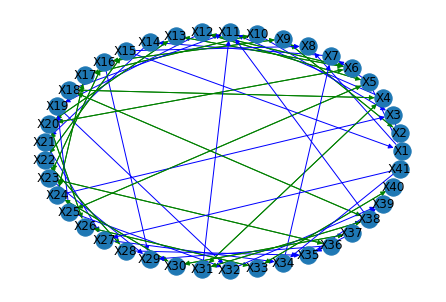

In [126]:
cg.find_fully_directed()

[(2, 0),
 (4, 0),
 (14, 0),
 (9, 2),
 (23, 2),
 (4, 6),
 (33, 6),
 (0, 7),
 (14, 7),
 (3, 10),
 (17, 10),
 (30, 10),
 (37, 10),
 (6, 13),
 (11, 18),
 (24, 18),
 (13, 20),
 (20, 26),
 (40, 26),
 (15, 28),
 (22, 28),
 (35, 28),
 (18, 31),
 (24, 31),
 (26, 33),
 (40, 33),
 (27, 34),
 (36, 34),
 (31, 38),
 (34, 38)]

In [116]:
test[test.columns[34]]

Country
Afghanistan    2.523
Albania        5.117
Algeria        4.887
Angola           NaN
Argentina      5.929
               ...  
Venezuela      4.892
Vietnam        5.411
Yemen          3.658
Zambia         4.073
Zimbabwe       3.145
Name: Life Ladder_2021, Length: 166, dtype: float64

In [ ]:
temp_df = all_data.drop(columns = ['Regional indicator'])

In [ ]:

columns = temp_df.columns[2:]
new_col_names = []
for i in range(2006,2022):
    year = str(i)
    for col in columns:
        col_name = f'{col}_{year}'
        new_col_names.append(col_name)

groups = temp_df.groupby('Country name')

num_cols = len(columns)
missing_year_data = [np.nan for i in range(num_cols)]
data = {}
for key, group in groups:
    row_data = []
    group_years = list(group['year'])
    c_group = group.drop(columns = 'Country name')
    c_group = c_group.set_index('year')
    for i in range(2006,2022):
        if i in group_years:
            row_data += list(c_group.loc[i])
        else:
            row_data += missing_year_data
    data[key] = row_data
    

reformatted_data = pd.DataFrame.from_dict(data, orient='index',columns = new_col_names)
reformatted_data

In [ ]:
reformatted_data.to_csv('final_data/WHD_and_CPDS.csv')

In [ ]:
def convert_to_int(x):
    return int(x)

CPDS_df['year'] = CPDS_df[['year']].applymap(convert_to_int)
CPDS_df.head()